In [1]:
import os
import pandas as pd

In [2]:
df = pd.DataFrame()
path = '../data/'
for file in os.listdir(path):
    df_ = pd.read_csv(path + file,index_col=0)
    df = pd.concat([df,df_])

In [4]:
df.head()

,Function,Region,Country,Resources,Service,Year,Avg. Cost($),Rating,Average Delivery Time,Number of Escalations
Supplier Name,,,,,,,,,,
Globant,Information Technology And Services,"Christchurch, Canterbury, New Zealand",New Zealand,4426.0,Email Services,2000,56.0,86.0,94.0,90.0
Dell,Information Technology And Services,"Fourways, Gauteng, South Africa",South Africa,55945.0,IT Consulting,2000,115.0,66.0,127.0,30.0
Robert Bosch Engineering And Business Solutions Ltd.,Information Technology And Services,"Midrand, Gauteng, South Africa",South Africa,5194.0,Managed Print Services,2000,55.0,61.0,179.0,89.0
Ncr Corporation,Information Technology And Services,"Milano, Lombardy, Italy",Italy,16404.0,Computer Training,2000,76.0,69.0,164.0,73.0
Iron Mountain,Information Technology And Services,"Cherasco, Piedmont, Italy",Italy,5861.0,Managed Print Services,2000,55.0,59.0,161.0,80.0


In [14]:
!pip install keras
!pip install tensorflow

  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached tensorflow_estimator-2.9.0-py2.py3-none-any.whl (438 kB)
Processing c:\users\yash gawankar\appdata\local\pip\cache\wheels\a0\16\9c\5473df82468f958445479c59e784896fa24f4a5fc024b0f501\termcolor-1.1.0-py3-none-any.whl
  Using cached tensorboard-2.9.1-py3-none-any.whl (5.8 MB)
  Using cached tensorflow_io_gcs_filesystem-0.26.0-cp38-cp38-win_amd64.whl (1.5 MB)
  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
  Attempting uninstall: absl-py
    Found existing installation: absl-py 0.12.0
    Can't uninstall 'absl-py'. No files were found to uninstall.
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.5.0
    Can't uninstall 'tensorboard'. 

ERROR: Could not install packages due to an EnvironmentError: [WinError 32] The process cannot access the file because it is being used by another process: 'C:\\ProgramData\\Anaconda3\\Lib\\site-packages\\tensorflow\\python\\_pywrap_tensorflow_internal.pyd'
Consider using the `--user` option or check the permissions.



  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached termcolor-1.1.0.tar.gz (3.9 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached tensorboard-2.9.1-py3-none-any.whl (5.8 MB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
  Using cached tensorflow_estimator-2.9.0-py2.py3-none-any.whl (438 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached absl_py-1.2.0-py3-none-any.whl (123 kB)
  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4835 sha256=228e522a26d32177e604c20143efe3b5a0c74df833dc257b8cea386921313460
  Stored in directory: c:\users\yash gawankar\appdata\local\pip\cache\wheels\a0\16\9c\5473df82468f958445479c59e784896fa24f4a5fc024b0f501
Successfully built termcolor
  Attempting uninstall: absl-py
    Found existing installation: absl-py 0.12.0
    Un

ERROR: Exception:
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\pip\_internal\cli\base_command.py", line 228, in _main
    status = self.run(options, args)
  File "C:\ProgramData\Anaconda3\lib\site-packages\pip\_internal\cli\req_command.py", line 182, in wrapper
    return func(self, options, args)
  File "C:\ProgramData\Anaconda3\lib\site-packages\pip\_internal\commands\install.py", line 323, in run
    requirement_set = resolver.resolve(
  File "C:\ProgramData\Anaconda3\lib\site-packages\pip\_internal\resolution\legacy\resolver.py", line 183, in resolve
    discovered_reqs.extend(self._resolve_one(requirement_set, req))
  File "C:\ProgramData\Anaconda3\lib\site-packages\pip\_internal\resolution\legacy\resolver.py", line 388, in _resolve_one
    abstract_dist = self._get_abstract_dist_for(req_to_install)
  File "C:\ProgramData\Anaconda3\lib\site-packages\pip\_internal\resolution\legacy\resolver.py", line 351, in _get_abstract_dist_for
    req.ch

In [17]:
# univariate lstm example
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

# define input sequence
# raw_seq = [10, 20, 30, 40, 50, 60, 70, 80, 90]
raw_seq = list(df['Resources'].values)
# choose a number of time steps
n_steps = 3
# split into samples
X, y = split_sequence(raw_seq, n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=50, verbose=1)
# demonstrate prediction
x_input = array([70, 80, 90])
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)

AttributeError: type object 'h5py.h5a.AttrID' has no attribute '__reduce_cython__'

In [19]:
df = pd.read_csv('test_data.csv')
df

,Supplier Name,Function,Region,Country,Resources,Service,Year,Avg. Cost($),Rating,Average Delivery Time,Number of Escalations
0,Globant,Information Technology And Services,"Christchurch, Canterbury, New Zealand",New Zealand,4426.000000,Email Services,2000,56.000000,86.000000,94.000000,90.000000
1,Globant,Information Technology And Services,"Christchurch, Canterbury, New Zealand",New Zealand,7510.024515,Email Services,2000,64.622686,90.400843,137.059103,93.173786
2,Globant,Information Technology And Services,"Christchurch, Canterbury, New Zealand",New Zealand,5641.234104,Email Services,2001,79.194691,98.217861,95.115606,103.797314
3,Globant,Information Technology And Services,"Christchurch, Canterbury, New Zealand",New Zealand,5406.737606,Email Services,2002,91.617539,89.457030,134.409905,102.607808
4,Globant,Information Technology And Services,"Christchurch, Canterbury, New Zealand",New Zealand,5608.572161,Email Services,2003,67.100376,92.602895,117.665294,92.057182
5,Globant,Information Technology And Services,"Christchurch, Canterbury, New Zealand",New Zealand,6765.364789,Email Services,2004,87.388708,104.125518,138.413784,101.446514
6,Globant,Information Technology And Services,"Christchurch, Canterbury, New Zealand",New Zealand,6146.768706,Email Services,2005,92.118798,98.613775,104.283816,112.388553
7,Globant,Information Technology And Services,"Christchurch, Canterbury, New Zealand",New Zealand,6664.047214,Email Services,2006,82.582328,89.530654,128.177546,95.383759
8,Globant,Information Technology And Services,"Christchurch, Canterbury, New Zealand",New Zealand,5624.273132,Email Services,2007,59.893171,90.035094,183.370568,96.542972
9,Globant,Information Technology And Services,"Christchurch, Canterbury, New Zealand",New Zealand,7928.285732,Email Services,2008,105.495216,107.278150,107.577651,104.364697


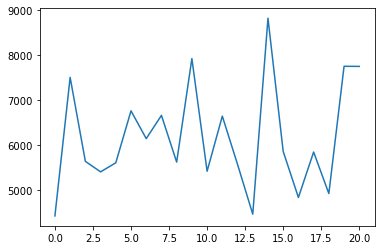

In [20]:
from matplotlib import pyplot
pyplot.plot(df.Resources)
pyplot.show()

In [21]:
from statsmodels.tsa.stattools import adfuller

In [22]:
passing_data=adfuller(df['Resources'])
def adf_test(res):
    result=adfuller(res)
    labels = ['Test parameters', 'p-value','#Lags Used','Dataset observations']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("Dataset is stationary")
    else:
        print("Dataset is non-stationary ")

In [24]:
adf_test(df['Resources'])

Test parameters : -3.805910724606426
p-value : 0.002847416197875288
#Lags Used : 3
Dataset observations : 17
Dataset is stationary
